In [1]:
import numpy as np
import pandas as pd

In [2]:
# https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm

In [3]:
# Download Dataset from https://www.dropbox.com/scl/fi/v7c1c8a3cnncuv1fo28es/Wages.xlsx?rlkey=vli12nwph687hvn9jskgf73a1&st=s862pfm6&dl=1
# and add it to colab

In [4]:
# wagesDf = pd.read_excel("./Wages.xlsx")
wagesDf = pd.read_excel("https://www.dropbox.com/scl/fi/v7c1c8a3cnncuv1fo28es/Wages.xlsx?rlkey=vli12nwph687hvn9jskgf73a1&st=s862pfm6&dl=1")

In [5]:
wagesDf

,Wage,Educ,Age
0,17.54,12,76
1,20.93,10,61
2,12.94,8,75
3,19.34,6,38
4,24.12,12,59
...,...,...,...
75,25.64,14,74
76,38.77,21,41
77,21.87,15,75
78,27.54,20,46


In [6]:
wagesDf.size

240

In [7]:
wagesDf.describe()

,Wage,Educ,Age
count,80.000000,80.000000,80.000000
mean,24.930500,13.850000,49.487500
std,7.479982,4.016107,17.213473
min,6.930000,6.000000,18.000000
25%,19.145000,10.000000,34.750000
50%,24.980000,14.000000,51.000000
75%,30.572500,17.000000,65.250000
max,43.440000,22.000000,77.000000


In [8]:
wagesDf.shape

(80, 3)

In [9]:
import matplotlib.pyplot as plt

In [10]:
# Plotting
fig1 = plt.figure(
  figsize=(8, 8)
)

<Figure size 800x800 with 0 Axes>

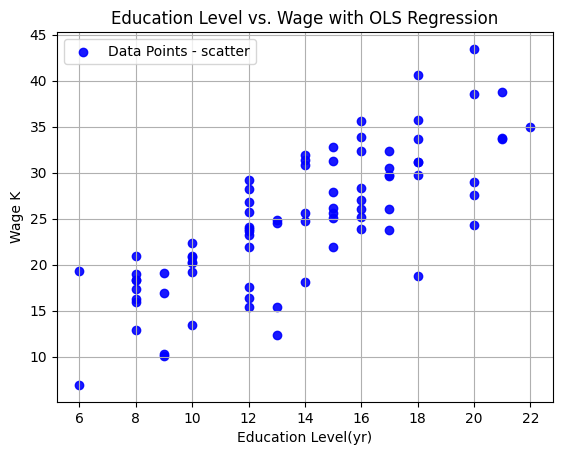

In [11]:
plt.scatter(
  wagesDf["Educ"],
  wagesDf["Wage"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)


plt.title('Education Level vs. Wage with OLS Regression')
plt.xlabel('Education Level(yr)')
plt.ylabel('Wage K')
plt.legend()
plt.grid(True)



plt.show()

In [12]:
wageEduModel = sm.OLS(
  wagesDf["Wage"],
  sm.add_constant(wagesDf["Educ"])
)
wageEduModelFit = wageEduModel.fit()
print(wageEduModelFit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     120.4
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           1.75e-17
Time:                        01:26:13   Log-Likelihood:                -236.64
No. Observations:                  80   AIC:                             477.3
Df Residuals:                      78   BIC:                             482.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8341      1.906      2.537      0.0

In [13]:
from functions.exportModel import exportModel
exportModel({
    "modelName": "wageEduModelFit",
    "model": wageEduModelFit,
    "description": "Predict Wage based on Educ for wagesDf",
    "modelType": "sm.OLS",
    "baseRelativePath": "..",
    "inputs": [
        {
            "name": "const",
            "type": "int"
        },
        {
            "name": "Educ",
            "type": "float"
        }
    ],
    "output": {
        "name": "Wage",
        "type": "float"
    }
})

In [14]:
predictedWage1 = wageEduModelFit.predict(sm.add_constant(wagesDf["Educ"]))
wagesDf['predictedWage1'] = predictedWage1
wagesDf

,Wage,Educ,Age,predictedWage1
0,17.54,12,76,22.246147
1,20.93,10,61,19.344145
2,12.94,8,75,16.442142
3,19.34,6,38,13.540139
4,24.12,12,59,22.246147
...,...,...,...,...
75,25.64,14,74,25.148150
76,38.77,21,41,35.305160
77,21.87,15,75,26.599152
78,27.54,20,46,33.854159


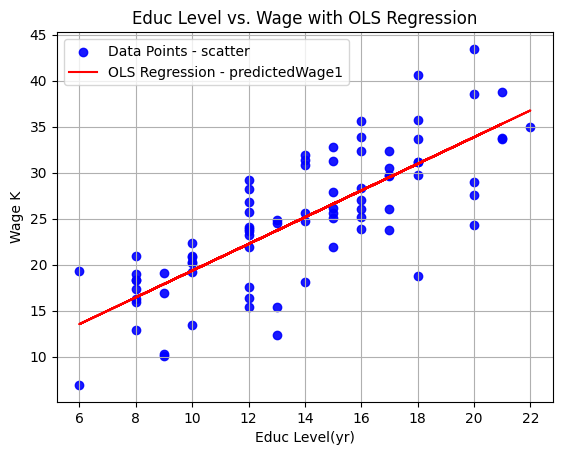

In [15]:


plt.scatter(
  wagesDf["Educ"],
  wagesDf["Wage"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.plot(
  wagesDf["Educ"],
  wagesDf["predictedWage1"],
  color='red',
  label='OLS Regression - predictedWage1'
)
plt.title('Educ Level vs. Wage with OLS Regression')
plt.xlabel('Educ Level(yr)')
plt.ylabel('Wage K')
plt.legend()
plt.grid(True)


plt.show()

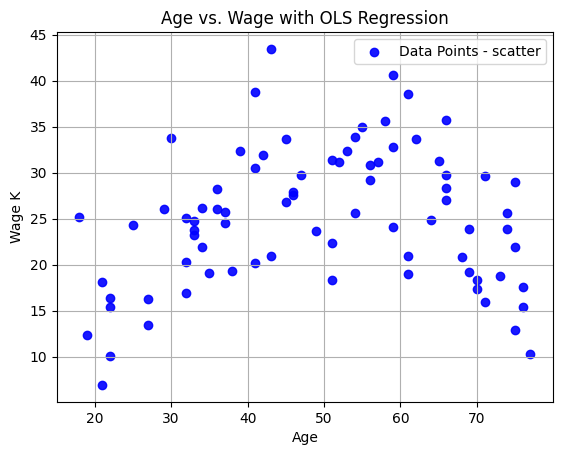

In [16]:
plt.scatter(
  wagesDf["Age"],
  wagesDf["Wage"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)


plt.title('Age vs. Wage with OLS Regression')
plt.xlabel('Age')
plt.ylabel('Wage K')
plt.legend()
plt.grid(True)



plt.show()

In [17]:
wageAgeModel = sm.OLS(
  wagesDf["Wage"],
  sm.add_constant(wagesDf["Age"])
)
wageAgeModelFit = wageAgeModel.fit()
print(wageAgeModelFit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.718
Date:                Sun, 09 Jun 2024   Prob (F-statistic):              0.194
Time:                        01:26:14   Log-Likelihood:                -273.12
No. Observations:                  80   AIC:                             550.2
Df Residuals:                      78   BIC:                             555.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.7740      2.548      8.544      0.0

In [18]:
from functions.exportModel import exportModel
exportModel({
    "modelName": "wageAgeModelFit",
    "model": wageAgeModelFit,
    "description": "Predict Wage based on Age for wagesDf",
    "modelType": "sm.OLS",
    "baseRelativePath": "..",
    "inputs": [
        {
            "name": "const",
            "type": "int"
        },
        {
            "name": "Age",
            "type": "float"
        }
    ],
    "output": {
        "name": "Wage",
        "type": "float"
    }
})

In [19]:
predictedWage2 = wageAgeModelFit.predict(sm.add_constant(wagesDf["Age"]))
wagesDf['predictedWage2'] = predictedWage2
wagesDf

,Wage,Educ,Age,predictedWage1,predictedWage2
0,17.54,12,76,22.246147,26.621568
1,20.93,10,61,19.344145,25.664811
2,12.94,8,75,16.442142,26.557784
3,19.34,6,38,13.540139,24.197784
4,24.12,12,59,22.246147,25.537243
...,...,...,...,...,...
75,25.64,14,74,25.148150,26.494001
76,38.77,21,41,35.305160,24.389135
77,21.87,15,75,26.599152,26.557784
78,27.54,20,46,33.854159,24.708054


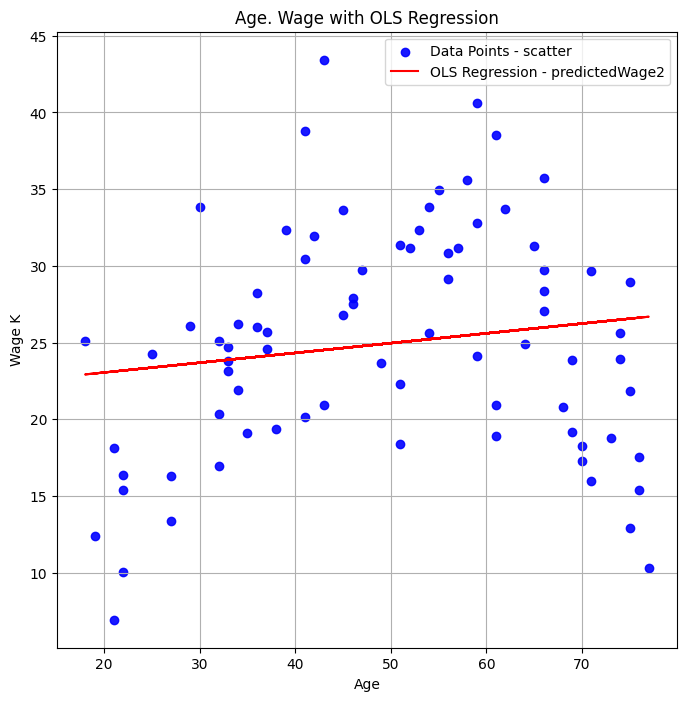

In [20]:
# Plotting
plt.figure(
  figsize=(8, 8)
)

plt.scatter(
  wagesDf["Age"],
  wagesDf["Wage"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.plot(
  wagesDf["Age"],
  wagesDf["predictedWage2"],
  color='red',
  label='OLS Regression - predictedWage2'
)
plt.title('Age. Wage with OLS Regression')
plt.xlabel('Age')
plt.ylabel('Wage K')
plt.legend()
plt.grid(True)



plt.show()

In [21]:
from functions.transformers import transformersDict
# wagesDf['agePower2'] = wagesDf.apply(lambda row: row['Age'] * row['Age'], axis=1)
wagesDf['agePower2'] = wagesDf.apply(transformersDict.get('AGE_POWER_2'), axis=1)
wagesDf

,Wage,Educ,Age,predictedWage1,predictedWage2,agePower2
0,17.54,12,76,22.246147,26.621568,5776.0
1,20.93,10,61,19.344145,25.664811,3721.0
2,12.94,8,75,16.442142,26.557784,5625.0
3,19.34,6,38,13.540139,24.197784,1444.0
4,24.12,12,59,22.246147,25.537243,3481.0
...,...,...,...,...,...,...
75,25.64,14,74,25.148150,26.494001,5476.0
76,38.77,21,41,35.305160,24.389135,1681.0
77,21.87,15,75,26.599152,26.557784,5625.0
78,27.54,20,46,33.854159,24.708054,2116.0


In [22]:
wagesDf = wagesDf.sort_values(by="Age")

In [23]:
wageAgePower2Model = sm.OLS(
  wagesDf["Wage"],
  sm.add_constant(wagesDf[["Age", "agePower2"]])
)
wageAgePower2ModelFit = wageAgePower2Model.fit()
print(wageAgePower2ModelFit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     25.72
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           2.79e-09
Time:                        01:26:14   Log-Likelihood:                -253.53
No. Observations:                  80   AIC:                             513.1
Df Residuals:                      77   BIC:                             520.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.4664      5.569     -2.598      0.0

In [24]:
from functions.exportModel import exportModel
exportModel({
    "modelName": "wageAgePower2ModelFit",
    "model": wageAgePower2ModelFit,
    "description": "Predict Wage based on Age quadradic for wagesDf",
    "modelType": "sm.OLS",
    "baseRelativePath": "..",
    "inputs": [
        {
            "name": "const",
            "type": "int"
        },
        {
            "name": "Age",
            "type": "float"
        }
    ],
    "transformers":[
        {
            "name": "agePower2",
            "transformer": "AGE_POWER_2"
        }
    ],
    "output": {
        "name": "Wage",
        "type": "float"
    }
})

In [25]:
predictedWage3 = wageAgePower2ModelFit.predict(sm.add_constant(wagesDf[["Age", "agePower2"]]))
wagesDf['predictedWage3'] = predictedWage3
wagesDf

,Wage,Educ,Age,predictedWage1,predictedWage2,agePower2,predictedWage3
69,25.13,16,18,28.050153,22.922107,324.0,11.536003
27,12.39,13,19,23.697149,22.985891,361.0,12.651138
62,6.93,6,21,13.540139,23.113459,441.0,14.777375
60,18.11,14,21,25.148150,23.113459,441.0,14.777375
28,16.37,12,22,22.246147,23.177243,484.0,15.788477
...,...,...,...,...,...,...,...
48,28.95,20,75,33.854159,26.557784,5625.0,19.752807
77,21.87,15,75,26.599152,26.557784,5625.0,19.752807
67,15.38,12,76,22.246147,26.621568,5776.0,18.891302
0,17.54,12,76,22.246147,26.621568,5776.0,18.891302


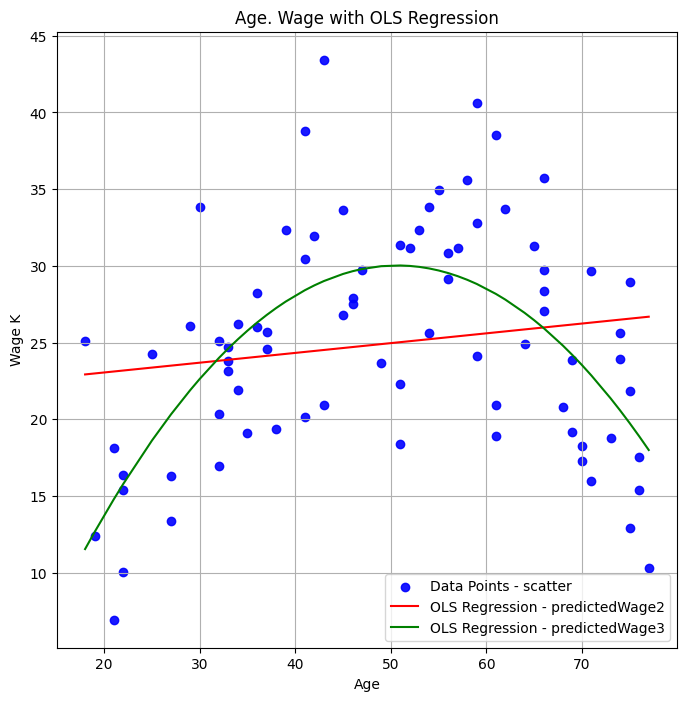

In [26]:
# Plotting
plt.figure(
  figsize=(8, 8)
)

plt.scatter(
  wagesDf["Age"],
  wagesDf["Wage"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.plot(
  wagesDf["Age"],
  wagesDf["predictedWage2"],
  color='red',
  label='OLS Regression - predictedWage2'
)

plt.plot(
  wagesDf["Age"],
  wagesDf["predictedWage3"],
  color='green',
  label='OLS Regression - predictedWage3'
)
plt.title('Age. Wage with OLS Regression')
plt.xlabel('Age')
plt.ylabel('Wage K')
plt.legend()
plt.grid(True)



plt.show()

In [27]:
wagesDf

,Wage,Educ,Age,predictedWage1,predictedWage2,agePower2,predictedWage3
69,25.13,16,18,28.050153,22.922107,324.0,11.536003
27,12.39,13,19,23.697149,22.985891,361.0,12.651138
62,6.93,6,21,13.540139,23.113459,441.0,14.777375
60,18.11,14,21,25.148150,23.113459,441.0,14.777375
28,16.37,12,22,22.246147,23.177243,484.0,15.788477
...,...,...,...,...,...,...,...
48,28.95,20,75,33.854159,26.557784,5625.0,19.752807
77,21.87,15,75,26.599152,26.557784,5625.0,19.752807
67,15.38,12,76,22.246147,26.621568,5776.0,18.891302
0,17.54,12,76,22.246147,26.621568,5776.0,18.891302


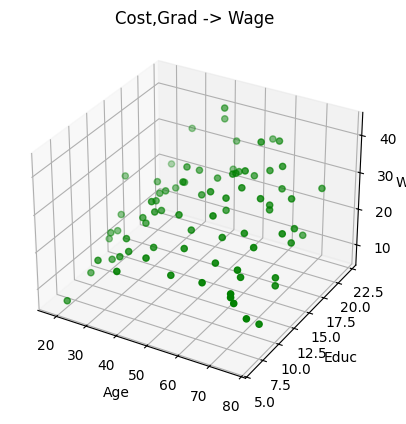

In [28]:
fig = plt.figure()
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(
  wagesDf["Age"],
  wagesDf["Educ"],
  wagesDf["Wage"],
  color = "green"
)
plt.title("Cost,Grad -> Wage")
ax.set_xlabel('Age')
ax.set_ylabel('Educ')
ax.set_zlabel('Wage')

# show plot
plt.show()

In [29]:
wageAgeEduModel1 = sm.OLS(
  wagesDf["Wage"],
  sm.add_constant(wagesDf[["Age", "Educ"]])
)
wageAgeEduModel1Fit = wageAgeEduModel1.fit()
print(wageAgeEduModel1Fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     62.47
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           7.57e-17
Time:                        01:26:14   Log-Likelihood:                -235.42
No. Observations:                  80   AIC:                             476.8
Df Residuals:                      77   BIC:                             484.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6381      2.366      1.115      0.2

In [30]:
from functions.exportModel import exportModel
exportModel({
    "modelName": "wageAgeEduModel1",
    "model": wageAgeEduModel1,
    "description": "Predict Wage based on Age and Educ for wagesDf",
    "modelType": "sm.OLS",
    "baseRelativePath": "..",
    "inputs": [
        {
            "name": "const",
            "type": "int"
        },
        {
            "name": "Age",
            "type": "float"
        },
        {
            "name": "Educ",
            "type": "float"
        }
    ],
    "output": {
        "name": "Wage",
        "type": "float"
    }
})

In [31]:
predictedWage4 = wageAgeEduModel1Fit.predict(
  sm.add_constant(wagesDf[["Age", "Educ"]])
)
wagesDf['predictedWage4'] = predictedWage4
wagesDf

,Wage,Educ,Age,predictedWage1,predictedWage2,agePower2,predictedWage3,predictedWage4
69,25.13,16,18,28.050153,22.922107,324.0,11.536003,26.543357
27,12.39,13,19,23.697149,22.985891,361.0,12.651138,22.267494
62,6.93,6,21,13.540139,23.113459,441.0,14.777375,12.274758
60,18.11,14,21,25.148150,23.113459,441.0,14.777375,23.802849
28,16.37,12,22,22.246147,23.177243,484.0,15.788477,20.967998
...,...,...,...,...,...,...,...,...
48,28.95,20,75,33.854159,26.557784,5625.0,19.752807,34.996187
77,21.87,15,75,26.599152,26.557784,5625.0,19.752807,27.791130
67,15.38,12,76,22.246147,26.621568,5776.0,18.891302,23.515267
0,17.54,12,76,22.246147,26.621568,5776.0,18.891302,23.515267


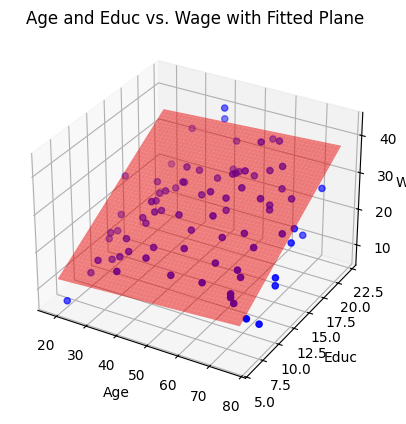

In [32]:
# Extracting coefficients
intercept = wageAgeEduModel1Fit.params['const']
coefAge = wageAgeEduModel1Fit.params['Age']
coefEduc = wageAgeEduModel1Fit.params['Educ']

# Create 3D grid for plotting
ageRange = np.linspace(wagesDf['Age'].min(), wagesDf['Age'].max(), 100)
educRange = np.linspace(wagesDf['Educ'].min(), wagesDf['Educ'].max(), 100)
ageGrid, educGrid = np.meshgrid(ageRange, educRange)

# Calculate predicted Wage for each combination of Age and Educ
wagePredictEq = intercept + coefAge * ageGrid + coefEduc * educGrid




fig = plt.figure()
ax = plt.axes(projection ="3d")

# Scatter plot of the actual data points
ax.scatter(wagesDf['Age'], wagesDf['Educ'], wagesDf['Wage'], color='blue', label='Actual Wage')

# Plotting the fitted plane
ax.plot_surface(ageGrid, educGrid, wagePredictEq, color='red', alpha=0.5, label='Fitted Plane')

# Labeling axes
ax.set_xlabel('Age')
ax.set_ylabel('Educ')
ax.set_zlabel('Wage')



plt.title('Age and Educ vs. Wage with Fitted Plane')

# Rotating the plot
# ax.view_init(elev=45, azim=45)  # Set the elevation and azimuth angles
plt.show()



In [33]:
wageAgePower2EducModel = sm.OLS(
  wagesDf["Wage"],
  sm.add_constant(wagesDf[["Age", "Educ", "agePower2"]])
)
wageAgePower2EducModelFit = wageAgePower2EducModel.fit()
print(wageAgePower2EducModelFit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     125.7
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           2.18e-29
Time:                        01:26:14   Log-Likelihood:                -202.56
No. Observations:                  80   AIC:                             413.1
Df Residuals:                      76   BIC:                             422.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.7219      3.023     -7.517      0.0

In [34]:
from functions.exportModel import exportModel
exportModel({
    "modelName": "wageAgePower2EducModelFit",
    "model": wageAgePower2EducModelFit,
    "description": "Predict Wage based on Age quadradic and Educ for wagesDf",
    "modelType": "sm.OLS",
    "baseRelativePath": "..",
    "inputs": [
        {
            "name": "const",
            "type": "int"
        },
        {
            "name": "Age",
            "type": "float"
        },
        {
            "name": "Educ",
            "type": "float"
        }
    ],
    "transformers":[
        {
            "name": "agePower2",
            "transformer": "AGE_POWER_2"
        }
    ],
    "output": {
        "name": "Wage",
        "type": "float"
    }
})

In [35]:
predictedWage5 = wageAgePower2EducModelFit.predict(
  sm.add_constant(wagesDf[["Age", "Educ", "agePower2"]])
)
wagesDf['predictedWage5'] = predictedWage5
wagesDf

,Wage,Educ,Age,predictedWage1,predictedWage2,agePower2,predictedWage3,predictedWage4,predictedWage5
69,25.13,16,18,28.050153,22.922107,324.0,11.536003,26.543357,17.325188
27,12.39,13,19,23.697149,22.985891,361.0,12.651138,22.267494,14.420408
62,6.93,6,21,13.540139,23.113459,441.0,14.777375,12.274758,7.276959
60,18.11,14,21,25.148150,23.113459,441.0,14.777375,23.802849,17.308629
28,16.37,12,22,22.246147,23.177243,484.0,15.788477,20.967998,15.577878
...,...,...,...,...,...,...,...,...,...
48,28.95,20,75,33.854159,26.557784,5625.0,19.752807,34.996187,28.672466
77,21.87,15,75,26.599152,26.557784,5625.0,19.752807,27.791130,22.402672
67,15.38,12,76,22.246147,26.621568,5776.0,18.891302,23.515267,17.979211
0,17.54,12,76,22.246147,26.621568,5776.0,18.891302,23.515267,17.979211


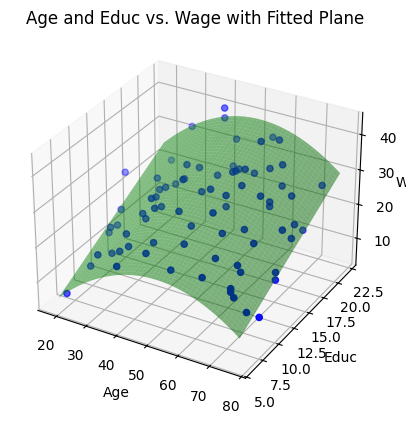

In [36]:
# Extracting coefficients
intercept2 = wageAgePower2EducModelFit.params['const']
coefAge2 = wageAgePower2EducModelFit.params['Age']
coefEduc2 = wageAgePower2EducModelFit.params['Educ']
coefAgePower22 = wageAgePower2EducModelFit.params['agePower2']

# Create 3D grid for plotting
ageRange = np.linspace(wagesDf['Age'].min(), wagesDf['Age'].max(), 100)
educRange = np.linspace(wagesDf['Educ'].min(), wagesDf['Educ'].max(), 100)
ageGrid, educGrid = np.meshgrid(ageRange, educRange)

# Calculate predicted Wage for each combination of Age and Educ
wagePredictEq2 = intercept2 + coefAge2 * ageGrid + coefEduc2 * educGrid + coefAgePower22 * ageGrid * ageGrid




fig = plt.figure()
ax = plt.axes(projection ="3d")

# Scatter plot of the actual data points
ax.scatter(wagesDf['Age'], wagesDf['Educ'], wagesDf['Wage'], color='blue', label='Actual Wage')



# Plotting the fitted plane
ax.plot_surface(ageGrid, educGrid, wagePredictEq2, color='green', alpha=0.5, label='Fitted Plane')

# Labeling axes
ax.set_xlabel('Age')
ax.set_ylabel('Educ')
ax.set_zlabel('Wage')



plt.title('Age and Educ vs. Wage with Fitted Plane')

# Rotating the plot
# ax.view_init(elev=45, azim=45)  # Set the elevation and azimuth angles
plt.show()

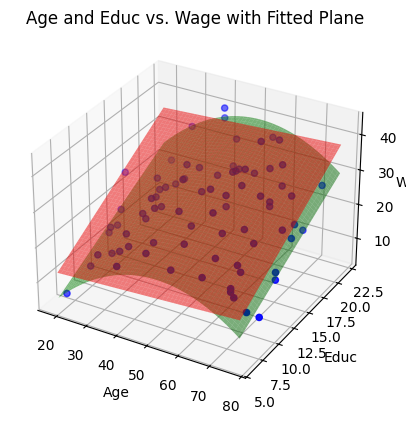

In [38]:
# Extracting coefficients
intercept2 = wageAgePower2EducModelFit.params['const']
coefAge2 = wageAgePower2EducModelFit.params['Age']
coefEduc2 = wageAgePower2EducModelFit.params['Educ']
coefAgePower22 = wageAgePower2EducModelFit.params['agePower2']

# Create 3D grid for plotting
ageRange = np.linspace(wagesDf['Age'].min(), wagesDf['Age'].max(), 100)
educRange = np.linspace(wagesDf['Educ'].min(), wagesDf['Educ'].max(), 100)
ageGrid, educGrid = np.meshgrid(ageRange, educRange)

# Calculate predicted Wage for each combination of Age and Educ
wagePredictEq2 = intercept2 + coefAge2 * ageGrid + coefEduc2 * educGrid + coefAgePower22 * ageGrid * ageGrid




fig = plt.figure()
ax = plt.axes(projection ="3d")

# Scatter plot of the actual data points
ax.scatter(wagesDf['Age'], wagesDf['Educ'], wagesDf['Wage'], color='blue', label='Actual Wage')

# Plotting the fitted plane
ax.plot_surface(ageGrid, educGrid, wagePredictEq, color='red', alpha=0.5, label='Fitted Plane')


# Plotting the fitted plane
ax.plot_surface(ageGrid, educGrid, wagePredictEq2, color='green', alpha=0.5, label='Fitted Plane')

# Labeling axes
ax.set_xlabel('Age')
ax.set_ylabel('Educ')
ax.set_zlabel('Wage')



plt.title('Age and Educ vs. Wage with Fitted Plane')

# Rotating the plot
# ax.view_init(elev=45, azim=45)  # Set the elevation and azimuth angles
plt.show()